In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
from scipy import stats
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_time = pd.read_json('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/ultimate_challenge/logins.json', orient='columns')




In [3]:
type(df_time)

pandas.core.frame.DataFrame

In [4]:
df_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [30]:
df_time.columns

Index(['login_time'], dtype='object')

In [5]:
df_time.set_index('login_time', inplace = True)
df_time['count'] = 1
#df_time['totalcnt'] = df_time.resample('15T', how = sum)


In [6]:
df_time['count'].unique()

array([1])

In [7]:
fifteen_summary = pd.DataFrame()
fifteen_summary['countlogin'] = df_time['count'].resample('15T').sum()

In [8]:
fifteen_summary.head()

,countlogin
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


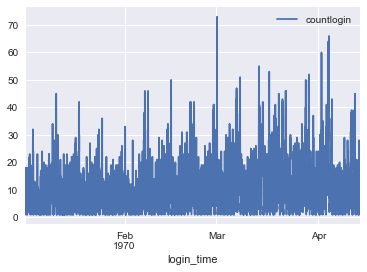

In [42]:
fifteen_summary.plot()

#### We can clearly see the trend above that there were higher number of logins during the March and April time frame as compared to January and February 

In [9]:
with open('/Users/chintan.desai/Documents/Chintan/DataScience/Springboard/Take_Home_Challenge/ultimate_challenge/ultimate_data_challenge.json') as f:
    
    data = json.load(f)
    

In [10]:
mpd = pd.DataFrame(data)

In [70]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [112]:
#check if the user is active or not
mpd.dtypes

avg_dist                          float64
avg_rating_by_driver              float64
avg_rating_of_driver              float64
avg_surge                         float64
city                               object
last_trip_date                     object
phone                              object
signup_date                        object
surge_pct                         float64
trips_in_first_30_days              int64
ultimate_black_user                  bool
weekday_pct                       float64
last_trip_date_dt          datetime64[ns]
signup_date_dt             datetime64[ns]
date_diff                 timedelta64[ns]
daysdiffnum                       float64
active                            float64
dtype: object

In [11]:
mpd['last_trip_date_dt'] = pd.to_datetime(mpd['last_trip_date'])

In [41]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,2014-06-17
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,2014-05-05
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,2014-01-07
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,2014-06-29
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,2014-03-15


In [12]:
mpd['signup_date_dt'] = pd.to_datetime(mpd['signup_date'])

In [43]:
mpd.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date                    object
phone                             object
signup_date                       object
surge_pct                        float64
trips_in_first_30_days             int64
ultimate_black_user                 bool
weekday_pct                      float64
last_trip_date_dt         datetime64[ns]
signup_date_dt            datetime64[ns]
dtype: object

In [13]:
mpd['date_diff'] = mpd.last_trip_date_dt-mpd.signup_date_dt

In [14]:
#daysdiffnum = difference in days between 'Sign up date' and 'last trip date'
for index, row in mpd.iterrows():
           daysdiff = row['date_diff'].days
           mpd.loc[index,'daysdiffnum']=daysdiff
        

In [15]:
#lets derive date 30 days before the 'last_trip_date_dt'

mpd['thirty_day_before_last_trip'] = mpd['last_trip_date_dt'] - pd.Timedelta('30 day')

In [16]:
#finding the max_date from all the last_trip_date_dt
max_last_trip_date_dt = max(mpd['last_trip_date_dt'])

In [17]:
min_last_trip_date_dt = min(mpd['last_trip_date_dt'])

In [18]:
thirty_day_before_max_last_trip = max_last_trip_date_dt - pd.Timedelta('30 day')

In [88]:
thirty_day_before_max_last_trip

Timestamp('2014-06-01 00:00:00')

In [19]:
#loop in all the rows and check if the (max_last_trip_date_dt - last_trip_date).days < 30 or not
#if yes then we will say that the user is active otherwise not
mpd['date_diff_max_lasttrip'] = max_last_trip_date_dt - mpd['last_trip_date_dt']

In [20]:
#daysdiffnum = difference in days between 'Sign up date' and 'last trip date'
for index, row in mpd.iterrows():
           daysdiff = row['date_diff_max_lasttrip'].days
           mpd.loc[index,'daysdiff_maxthirty']=daysdiff
        

In [21]:
for index, row in mpd.iterrows():
        if row['daysdiff_maxthirty'] <= 30:
                mpd.loc[index,'rider_retained']=1 
        else:
                mpd.loc[index,'rider_retained']=0
        

In [22]:
mpd.loc[0]

avg_dist                                      3.67
avg_rating_by_driver                             5
avg_rating_of_driver                           4.7
avg_surge                                      1.1
city                                King's Landing
last_trip_date                          2014-06-17
phone                                       iPhone
signup_date                             2014-01-25
surge_pct                                     15.4
trips_in_first_30_days                           4
ultimate_black_user                           True
weekday_pct                                   46.2
last_trip_date_dt              2014-06-17 00:00:00
signup_date_dt                 2014-01-25 00:00:00
date_diff                        143 days 00:00:00
daysdiffnum                                    143
thirty_day_before_last_trip    2014-05-18 00:00:00
date_diff_max_lasttrip            14 days 00:00:00
daysdiff_maxthirty                              14
rider_retained                 

In [55]:
for index, row in mpd.iterrows():
        if row['trips_in_first_30_days'] >= 1:
                mpd.loc[index,'active']=1 
        else:
                mpd.loc[index,'active']=0
        

In [105]:
retained_dr = mpd.loc[mpd['rider_retained']==1,:]

In [115]:
retained_num_dr = retained['rider_retained'].count()

In [116]:
retained_num_dr

18804

In [117]:
not_retained_dr = mpd.loc[mpd['rider_retained']==0,:]
not_retained_num_dr = not_retained_dr['rider_retained'].count()

In [118]:
retained_fraction_dr = (retained_num_dr)/(retained_num_dr+not_retained_num_dr)

In [119]:
retained_fraction_dr

0.37608000000000003

### Retention Rate = 37%

In [23]:
mpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
avg_dist                       50000 non-null float64
avg_rating_by_driver           49799 non-null float64
avg_rating_of_driver           41878 non-null float64
avg_surge                      50000 non-null float64
city                           50000 non-null object
last_trip_date                 50000 non-null object
phone                          49604 non-null object
signup_date                    50000 non-null object
surge_pct                      50000 non-null float64
trips_in_first_30_days         50000 non-null int64
ultimate_black_user            50000 non-null bool
weekday_pct                    50000 non-null float64
last_trip_date_dt              50000 non-null datetime64[ns]
signup_date_dt                 50000 non-null datetime64[ns]
date_diff                      50000 non-null timedelta64[ns]
daysdiffnum                    50000 non-null float64
thirty_day_bef

In [24]:
for index, row in mpd.iterrows():
        if row['daysdiffnum'] >= 180:
                mpd.loc[index,'active_after_sixmnth']=1 
        else:
                mpd.loc[index,'active_after_sixmnth']=0
        

In [87]:
mpd.iloc[7]

avg_dist                                 2.04
avg_rating_by_driver                        5
avg_rating_of_driver                        5
avg_surge                                   1
city                               Winterfell
last_trip_date                     2014-01-29
phone                                  iPhone
signup_date                        2014-01-28
surge_pct                                   0
trips_in_first_30_days                      2
ultimate_black_user                     False
weekday_pct                               100
last_trip_date_dt         2014-01-29 00:00:00
signup_date_dt            2014-01-28 00:00:00
date_diff                     1 days 00:00:00
daysdiffnum                                 1
active                                      1
active_after_sixmnth                        0
Name: 7, dtype: object

In [28]:

for index, row in mpd.iterrows():
            dt = row['signup_date_dt']
            mpd.loc[index,'signup_day_of_week'] = dt.weekday()
            
        

In [29]:
mpd.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,last_trip_date_dt,signup_date_dt,date_diff,daysdiffnum,thirty_day_before_last_trip,date_diff_max_lasttrip,daysdiff_maxthirty,rider_retained,active_after_sixmnth,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,...,2014-06-17,2014-01-25,143 days,143.0,2014-05-18,14 days,14.0,1.0,0.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,...,2014-05-05,2014-01-29,96 days,96.0,2014-04-05,57 days,57.0,0.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,...,2014-01-07,2014-01-06,1 days,1.0,2013-12-08,175 days,175.0,0.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,...,2014-06-29,2014-01-10,170 days,170.0,2014-05-30,2 days,2.0,1.0,0.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,...,2014-03-15,2014-01-27,47 days,47.0,2014-02-13,108 days,108.0,0.0,0.0,0.0


#### Avg_rating_by_driver 

In [30]:
mpd.avg_rating_by_driver.unique()

array([ 5. ,  4.9,  4. ,  3. ,  4.8,  4.7,  4.5,  4.2,  nan,  4.4,  4.6,
        3.7,  4.3,  3.5,  2. ,  3.8,  2.5,  4.1,  3.9,  1. ,  3.3,  3.4,
        3.6,  3.2,  2.3,  2.8,  1.5,  2.7])

In [32]:
mpd['avg_rating_by_driver']=mpd['avg_rating_by_driver'].fillna(round(mpd['avg_rating_by_driver'].mean(),2))

In [33]:
mpd.avg_rating_by_driver.unique()

array([ 5.  ,  4.9 ,  4.  ,  3.  ,  4.8 ,  4.7 ,  4.5 ,  4.2 ,  4.78,
        4.4 ,  4.6 ,  3.7 ,  4.3 ,  3.5 ,  2.  ,  3.8 ,  2.5 ,  4.1 ,
        3.9 ,  1.  ,  3.3 ,  3.4 ,  3.6 ,  3.2 ,  2.3 ,  2.8 ,  1.5 ,  2.7 ])

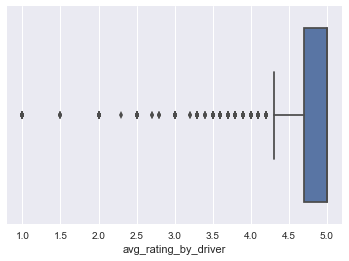

In [34]:
sns.boxplot(x='avg_rating_by_driver', data=mpd)

#### avg_dist

In [35]:
mpd.avg_dist.unique()

array([  3.67,   8.26,   0.77, ...,  38.72,  27.47,  30.39])

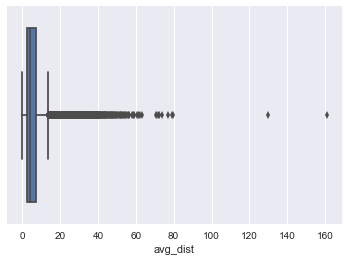

In [36]:
sns.boxplot(x='avg_dist', data=mpd)

In [37]:
mpd.loc[mpd['avg_dist'].isnull(),:]

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,...,last_trip_date_dt,signup_date_dt,date_diff,daysdiffnum,thirty_day_before_last_trip,date_diff_max_lasttrip,daysdiff_maxthirty,rider_retained,active_after_sixmnth,signup_day_of_week


#### Avg_rating_of_driver

In [38]:
mpd.avg_rating_of_driver.unique()

array([ 4.7,  5. ,  4.3,  4.6,  4.4,  3.5,  nan,  4.5,  4. ,  3.9,  4.9,
        4.8,  2.5,  3.7,  1. ,  4.1,  4.2,  3. ,  3.8,  2. ,  2.7,  3.3,
        2.8,  3.6,  3.4,  3.2,  2.6,  3.1,  2.9,  1.7,  1.8,  1.5,  2.3,
        1.9,  2.1,  2.4,  1.6,  2.2])

In [39]:
mpd['avg_rating_of_driver']=mpd['avg_rating_of_driver'].fillna(round(mpd['avg_rating_of_driver'].mean(),2))

In [40]:
mpd.avg_rating_of_driver.unique()

array([ 4.7,  5. ,  4.3,  4.6,  4.4,  3.5,  4.5,  4. ,  3.9,  4.9,  4.8,
        2.5,  3.7,  1. ,  4.1,  4.2,  3. ,  3.8,  2. ,  2.7,  3.3,  2.8,
        3.6,  3.4,  3.2,  2.6,  3.1,  2.9,  1.7,  1.8,  1.5,  2.3,  1.9,
        2.1,  2.4,  1.6,  2.2])

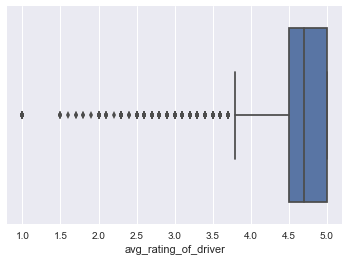

In [41]:
sns.boxplot(x='avg_rating_of_driver', data=mpd)

#### Avg_Surge

In [42]:
mpd.avg_surge.unique()

array([ 1.1 ,  1.  ,  1.14,  1.19,  1.38,  1.21,  1.17,  1.02,  1.05,
        1.5 ,  2.  ,  1.25,  1.04,  1.88,  1.33,  1.56,  1.06,  1.03,
        1.09,  1.35,  3.5 ,  1.11,  1.63,  2.5 ,  1.32,  1.3 ,  1.75,
        2.25,  1.2 ,  1.13,  1.08,  1.15,  4.  ,  1.12,  1.22,  1.29,
        1.23,  1.01,  1.07,  1.18,  1.45,  2.75,  2.63,  1.46,  2.07,
        1.27,  3.  ,  1.36,  1.96,  1.42,  1.44,  1.54,  1.16,  1.31,
        1.58,  1.92,  1.67,  1.26,  4.75,  1.41,  3.25,  1.24,  2.13,
        1.6 ,  1.57,  1.34,  1.52,  1.69,  5.  ,  1.4 ,  1.37,  1.7 ,
        1.78,  1.43,  1.94,  1.64,  1.83,  1.28,  1.85,  1.55,  1.48,
        1.39,  2.88,  4.25,  1.47,  1.51,  1.9 ,  1.68,  4.5 ,  1.66,
        2.33,  1.65,  1.71,  2.17,  2.38,  1.61,  2.08,  3.75,  8.  ,
        1.77,  1.49,  2.42,  1.59,  1.8 ,  2.19,  1.53,  1.81,  5.75,
        1.79,  2.44,  2.67,  2.31,  2.1 ,  2.2 ,  3.63])

#### City

In [43]:
mpd.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

#### Phone

In [44]:
mpd.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

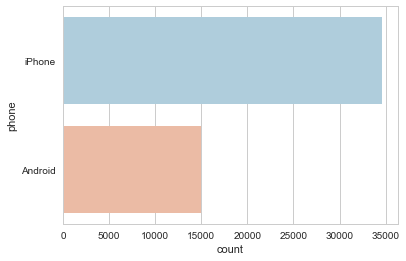

In [45]:
sns.set_style('whitegrid')
sns.countplot(y=mpd['phone'],data=mpd,palette='RdBu_r')

#### Signup_date

In [46]:
mpd.signup_date.unique()

array(['2014-01-25', '2014-01-29', '2014-01-06', '2014-01-10',
       '2014-01-27', '2014-01-09', '2014-01-24', '2014-01-28',
       '2014-01-21', '2014-01-03', '2014-01-13', '2014-01-15',
       '2014-01-11', '2014-01-12', '2014-01-02', '2014-01-31',
       '2014-01-19', '2014-01-16', '2014-01-26', '2014-01-05',
       '2014-01-17', '2014-01-22', '2014-01-18', '2014-01-20',
       '2014-01-04', '2014-01-30', '2014-01-07', '2014-01-01',
       '2014-01-08', '2014-01-23', '2014-01-14'], dtype=object)

#### Surge_pct

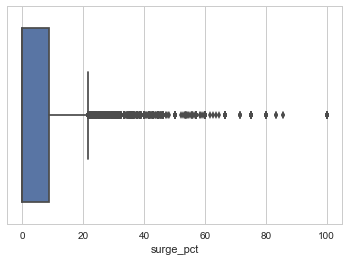

In [47]:
sns.boxplot(x='surge_pct', data=mpd)

#### trips_in_first_30_days

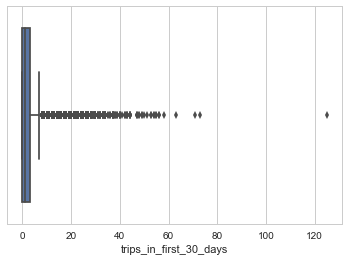

In [151]:
sns.boxplot(x='trips_in_first_30_days', data=mpd)

#### ultimate_black_user

In [160]:

mpd.ultimate_black_user.unique()

array([ True, False], dtype=bool)

#### weekday_pct

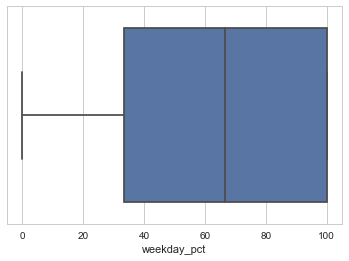

In [154]:
sns.boxplot(x='weekday_pct', data=mpd)

In [48]:
mpd_orig = mpd

In [49]:
mpd.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,date_diff,daysdiffnum,date_diff_max_lasttrip,daysdiff_maxthirty,rider_retained,active_after_sixmnth,signup_day_of_week
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778166,4.601306,1.074764,8.849536,2.278200,60.926084,92 days 18:57:44.640000,92.790100,72 days 15:57:55.008000,72.665220,0.376080,0.001700,3.309620
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,62 days 03:06:56.580842,62.129822,61 days 17:15:20.288309,61.718985,0.484405,0.041196,1.880666
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0 days 00:00:00,0.000000,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27 days 00:00:00,27.000000,13 days 00:00:00,13.000000,0.000000,0.000000,2.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,110 days 00:00:00,110.000000,54 days 00:00:00,54.000000,0.000000,0.000000,4.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150 days 00:00:00,150.000000,137 days 00:00:00,137.000000,1.000000,0.000000,5.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181 days 00:00:00,181.000000,181 days 00:00:00,181.000000,1.000000,1.000000,6.000000


####  We will drop Categorical variable 'Phone' and will keep the variable 'City'


In [50]:
mpd_final_one = mpd.drop(['phone'],axis=1)

In [51]:
mpd_final_one = mpd_final_one.drop(['date_diff'],axis=1)

In [52]:
mpd_final_one.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,last_trip_date_dt,signup_date_dt,daysdiffnum,thirty_day_before_last_trip,date_diff_max_lasttrip,daysdiff_maxthirty,rider_retained,active_after_sixmnth,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,2014-01-25,15.4,4,True,46.2,2014-06-17,2014-01-25,143.0,2014-05-18,14 days,14.0,1.0,0.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,2014-01-29,0.0,0,False,50.0,2014-05-05,2014-01-29,96.0,2014-04-05,57 days,57.0,0.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,2014-01-06,0.0,3,False,100.0,2014-01-07,2014-01-06,1.0,2013-12-08,175 days,175.0,0.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,2014-01-10,20.0,9,True,80.0,2014-06-29,2014-01-10,170.0,2014-05-30,2 days,2.0,1.0,0.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,2014-01-27,11.8,14,False,82.4,2014-03-15,2014-01-27,47.0,2014-02-13,108 days,108.0,0.0,0.0,0.0


In [53]:
#dropping the dates field
mpd_final_one = mpd_final_one.drop(['last_trip_date','signup_date','last_trip_date_dt','signup_date_dt','thirty_day_before_last_trip','date_diff_max_lasttrip','daysdiff_maxthirty','active_after_sixmnth'],axis=1)


In [54]:
mpd_final_one.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,rider_retained,signup_day_of_week
0,3.67,5.0,4.7,1.10,King's Landing,15.4,4,True,46.2,143.0,1.0,5.0
1,8.26,5.0,5.0,1.00,Astapor,0.0,0,False,50.0,96.0,0.0,2.0
2,0.77,5.0,4.3,1.00,Astapor,0.0,3,False,100.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,King's Landing,20.0,9,True,80.0,170.0,1.0,4.0
4,3.13,4.9,4.4,1.19,Winterfell,11.8,14,False,82.4,47.0,0.0,0.0


In [55]:
mpd_final_one.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,daysdiffnum,rider_retained,signup_day_of_week
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778166,4.601306,1.074764,8.849536,2.278200,60.926084,92.790100,0.376080,3.309620
std,5.707357,0.445753,0.564977,0.222336,19.958811,3.792684,37.081503,62.129822,0.484405,1.880666
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,27.000000,0.000000,2.000000
50%,3.880000,5.000000,4.700000,1.000000,0.000000,1.000000,66.700000,110.000000,0.000000,4.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150.000000,1.000000,5.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000,1.000000,6.000000


In [56]:
mpd_final = pd.get_dummies(mpd_final_one,drop_first=True)

In [57]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,rider_retained,signup_day_of_week,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,True,46.2,143.0,1.0,5.0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,False,50.0,96.0,0.0,2.0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,False,100.0,1.0,0.0,0.0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,True,80.0,170.0,1.0,4.0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,False,82.4,47.0,0.0,0.0,0,1


In [58]:

#converting boolean to string

booleandf = mpd_final.select_dtypes(include=[bool])
booleanDictionary = {True: 'TRUE', False: 'FALSE'}

#loop by df is loop by columns, same as for column in booleandf.columns:
for column in booleandf:
    if column == 'ultimate_black_user':
        mpd_final[column] = mpd_final[column].map(booleanDictionary)


In [59]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,daysdiffnum,rider_retained,signup_day_of_week,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,TRUE,46.2,143.0,1.0,5.0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,FALSE,50.0,96.0,0.0,2.0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,FALSE,100.0,1.0,0.0,0.0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,TRUE,80.0,170.0,1.0,4.0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,FALSE,82.4,47.0,0.0,0.0,0,1


In [60]:
#For 'ultimate_black_user' replacing True with '1' and False with '0'

mpd_final['ultimate_black_user_nm'] = mpd_final['ultimate_black_user'].map({'TRUE': 1, 'FALSE': 0})

In [62]:
mpd_final = mpd_final.drop(['ultimate_black_user'],axis=1)

In [63]:
mpd_final.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,daysdiffnum,rider_retained,signup_day_of_week,city_King's Landing,city_Winterfell,ultimate_black_user_nm
0,3.67,5.0,4.7,1.10,15.4,4,46.2,143.0,1.0,5.0,1,0,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,96.0,0.0,2.0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,1.0,0.0,0.0,0,0,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,170.0,1.0,4.0,1,0,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,47.0,0.0,0.0,0,1,0


In [64]:
mpd_final.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'daysdiffnum',
       'rider_retained', 'signup_day_of_week', 'city_King's Landing',
       'city_Winterfell', 'ultimate_black_user_nm'],
      dtype='object')

In [65]:
mpd_final.rename(columns={'city_King\'s Landing': 'city_KingsLanding'}, inplace=True)

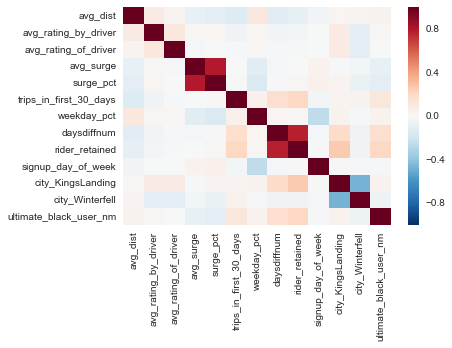

In [66]:
sns.heatmap(mpd_final.corr())

In [67]:
#removing the highly co-related features
#removing avg_surge and trips_in_first_30_days
mpd_final = mpd_final.drop(['avg_surge','trips_in_first_30_days'],axis=1)


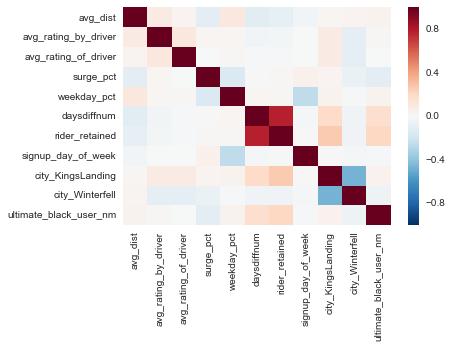

In [68]:
sns.heatmap(mpd_final.corr())

In [69]:
mpd_final.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'surge_pct',
       'weekday_pct', 'daysdiffnum', 'rider_retained', 'signup_day_of_week',
       'city_KingsLanding', 'city_Winterfell', 'ultimate_black_user_nm'],
      dtype='object')

In [70]:
dataset_Y = mpd_final['rider_retained']
dataset_X = mpd_final[['avg_dist','avg_rating_by_driver','avg_rating_of_driver','surge_pct','weekday_pct','daysdiffnum','city_KingsLanding','city_Winterfell','ultimate_black_user_nm']]


#### Trying Logistic Regression to conduct initial analysis

In [71]:
import statsmodels.api as sm
logit = sm.Logit(dataset_Y, dataset_X)
result = logit.fit()
result.summary()

//anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.130851
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         rider_retained   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49991
Method:                           MLE   Df Model:                            8
Date:                Mon, 06 Aug 2018   Pseudo R-squ.:                  0.8024
Time:                        16:32:38   Log-Likelihood:                -6542.5
converged:                       True   LL-Null:                       -33106.
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
avg_dist                  -0.0053      0.004     -1.221      0.222      -0.014       0.003
avg_rating_by_driver      -2.8671      0.052    -55.210      0.000      -2.969      -2.765
avg_rating_of_driver      -1.2243      0.040    -30.450      0.000      -1.303      -1.145
surge_pct                 -0.0022      0.001     -1.663      0.096      -0.005       0.000
weekday_pct               -0.0072      0.001    -10.356      0.000      -0.009      -0.006
daysdiffnum                0.1458      0.002     79.000      0.000       0.142       0.149
city_KingsLanding          1.6650      0.066     25.351      0.000       1.536       1.794
city_Winterfell           -0.0731      0.051     -1.422      0.155      -0.174       0.028
ultimate_black_user_nm     0.7051      0.047     14.878      0.000       0.612       0.798
==========================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(dataset_X,dataset_Y, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [75]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.956


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97      9386
        1.0       0.93      0.96      0.94      5614

avg / total       0.96      0.96      0.96     15000



#### Using Random Forest  since its tree based ensemble which perform well on imbalanced dataset such as this because their hierarchal structure allows them to learn signals from both classes.
#### Further we also use the hyper parameter of Random Forest 'class_weight' and assign a value 'balanced' to further assign the wight to the classes such that the weight is inversely proportional to how frequently they appear in the data

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

//anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [78]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
 
    score = r2_score(y_true, y_predict)
 
    return score

In [91]:
def fit_model_rf(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0) #validation/holdout size=0.20

    #   Create a decision tree regressor object
    classifier = RandomForestClassifier()

    #  Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    #params = {'max_depth': range(1, 11),'max_leaf_nodes':[200,300],'n_estimators':[5,10,20]}
    
    params = {'max_depth': [20,40],'n_estimators':[150,200],'class_weight':['balanced']}
    
    
    '''
       params = {
                'bootstrap': [True], #check with False
                'max_depth': [80, 90, 100, 110], # 2,4,8 small trees with random forest ,
                will give us overfitting with large trees, use very simple trees but many of them
                'max_features': [2, 3], # keep wide range , 10,100
                'min_samples_leaf': [3, 4, 5], #can avoid it
                'min_samples_split': [8, 10, 12], #use small numbers 4,40
                'n_estimators': [100, 200, 300, 1000] #this is important 10,50,100,150
                }

    
    '''
    

    #  Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    #  Create the grid search object
    grid = GridSearchCV(classifier, params, scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [92]:
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset_X,dataset_Y,train_size=0.8)


clf6 = fit_model_rf(Xtrain, ytrain)

print(clf6)

predictions = clf6.predict(Xtest)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=40, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [93]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

        0.0       0.97      0.96      0.96      6175
        1.0       0.93      0.95      0.94      3825

avg / total       0.95      0.95      0.95     10000



In [94]:
feature_list = np.array(dataset_X.columns.values)

In [95]:
# Get numerical feature importances
importances = list(clf6.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: daysdiffnum          Importance: 0.78
Variable: avg_rating_by_driver Importance: 0.05
Variable: avg_dist             Importance: 0.04
Variable: surge_pct            Importance: 0.04
Variable: weekday_pct          Importance: 0.04
Variable: city_KingsLanding    Importance: 0.02
Variable: avg_rating_of_driver Importance: 0.01
Variable: ultimate_black_user_nm Importance: 0.01
Variable: city_Winterfell      Importance: 0.0


#### Note that we have a little impbalanced data since we dont have enough training data for long term (> six months) users , having more training data on the users who are active after six months would have really helped Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system but with RandomForest's 'class_wight=Balanced' hyper parameter we are inversly assigning more weights to the class that has least amount of rows in the training data thus try to overcome the issue of imbalance data

#### Based on the analysis above we can clearly see that 'avg_rating_by_driver','avg_dist','weekday_pct'  and 'surge_pct'  are the most important factors 

#### Thus the Ultimate should focus more on improving the user experience in the first 30 days tomake sure 'avg_dist' is high ,weekday ridership as well as average rating by driver along with attracting more business during Surge hours are very important factors in order to retain the driver beyond six months
